<a href="https://colab.research.google.com/github/Jiho-korea/DeepLearning/blob/master/%EC%98%88%EC%A0%9C2_%EB%8B%B9%EB%87%A8%EB%B3%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!pip install --upgrade tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 36kB/s 
     |████████████████████████████████| 512kB 45.2MB/s 
     |████████████████████████████████| 3.8MB 41.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=a9f2918f9c94d42f43737ed89c223260f60b14d48fd2afe7c5ecae3f4590b461
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: 

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [0]:
tf.set_random_seed(777)

In [0]:
# 데이터 확인, 분석을 위해 pandas 를 사용
xy_df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/DeepLearningPrac/tensorflowPrac/logistic/kaggle/예제2_당뇨병.csv', dtype=np.float32)
xy_df = xy_df.dropna(how='all', axis=0)  # 결측치 제거

In [6]:
xy_df.columns = ['임신횟수', '공복혈당농도', '혈압', '피부주름두께', '혈정인슐린', 'BMI', '당뇨병가족력', '나이', '예측결과']  # 칼럼명 한글로 변경
xy_df # 데이터프레임 확인

,임신횟수,공복혈당농도,혈압,피부주름두께,혈정인슐린,BMI,당뇨병가족력,나이,예측결과
0,6.0,148.0,72.0,35.0,0.0,33.599998,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.299999,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.100000,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.099998,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.900002,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.799999,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.200001,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.100000,0.349,47.0,1.0


In [7]:
pd.DataFrame(xy_df.mean(), columns=["평균 값"])

,평균 값
임신횟수,3.845052
공복혈당농도,120.894531
혈압,69.105469
피부주름두께,20.536459
혈정인슐린,79.799477
BMI,31.992609
당뇨병가족력,0.471876
나이,33.240887
예측결과,0.348958


In [0]:
y_data = xy_df.iloc[:,-1].values.reshape(-1,1)  # 레이블 데이터(예측결과)를 numpy로 추출

In [0]:
x_data = xy_df.iloc[:,:-1].values  # 피쳐데이터를 numpy로 추출

In [0]:
# 넘파이 배열 내 데이터타입 변경
x_data = x_data.astype('float32')
y_data = y_data.astype('float32')

In [11]:
print(y_data.shape)
print(y_data[:7]) #레이블 확인

(768, 1)
[[1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]]


In [12]:
print(x_data.shape)
print(x_data[:7,:]) # 피쳐 확인

(768, 8)
[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]
 [5.000e+00 1.160e+02 7.400e+01 0.000e+00 0.000e+00 2.560e+01 2.010e-01
  3.000e+01]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01]]


In [13]:
np.unique(y_data, return_counts=True)

(array([0., 1.], dtype=float32), array([500, 268]))

In [0]:
# 테스트세트를 분리
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, stratify=y_data, random_state=777) # 전체 데이터중 30%

In [15]:
np.unique(y_train, return_counts=True)

(array([0., 1.], dtype=float32), array([350, 187]))

In [16]:
print("학습용 ",x_train.shape, "\t", y_train.shape) # 학습용 피쳐, 레이블 데이터 
print("테스트용 ",x_test.shape, "\t", y_test.shape) # 테스트용 피쳐, 레이블 데이터

학습용  (537, 8) 	 (537, 1)
테스트용  (231, 8) 	 (231, 1)


In [0]:
scaler = StandardScaler()

In [0]:
# 텐서플로우 그래프 그리기
num_x = x_data.shape[1]
X = tf.placeholder(tf.float32, shape=[None, num_x]) 
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random.normal([num_x , 1]), name='weight') 
b = tf.Variable(tf.random.normal([1]), name='bias')

In [0]:
hypothesis = tf.sigmoid(tf.matmul(X,W) + b)

In [0]:
cost = -tf.reduce_mean(Y*tf.log(hypothesis) +  (1-Y)*tf.log(1-hypothesis))

In [0]:
train = tf.train.GradientDescentOptimizer(learning_rate=1e-3).minimize(cost)

In [0]:
predicted = tf.cast(hypothesis > 0.5 , dtype=tf.float32)

In [0]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [0]:
sess = tf.Session()

In [0]:
sess.run(tf.global_variables_initializer())

In [0]:
w_history = [] # 변화하는 가중치 행렬을 담기위한 리스트
cost_list = [] # 감소하는 cost를 담기위한 리스트

In [0]:
n_fold = 5 # 5개의 폴드
skf = StratifiedKFold(n_splits=n_fold) 
cv_accuracy = [] # 폴드세트별 정확도를 저장할 리스트

In [28]:
epochs = 4501
  
for step in range(epochs):
  fold_cost = 0
  fold_accuracy = 0
  for train_index, test_index in skf.split(x_train, y_train):
    train_random_index = np.random.permutation(train_index)
    test_random_index = np.random.permutation(test_index)

     # 학습폴드, 검증폴드 분리(피쳐, 레이블 별)
    train_feature_fold, val_feature_fold = x_train[train_random_index], x_train[test_random_index]
    train_label_fold, val_label_fold = y_train[train_random_index], y_train[test_random_index]

    # 학습폴드를 기준으로 표준화
    scaler.fit(train_feature_fold)
    
    # 학습폴드를 기준으로 학습폴드, 검증폴드를 표준화
    train_feature_fold_scaled = scaler.transform(train_feature_fold) 
    val_feature_fold_scaled = scaler.transform(val_feature_fold) 

    # 학습폴드로 학습 
    cost_val, W_all, _ = sess.run([cost, W, train], feed_dict={X:train_feature_fold_scaled, Y:train_label_fold})

    fold_cost += cost_val
    w_history.append(W_all.copy())  

    # 폴드세트별 Accuracy 저장 
    fold_accuracy += sess.run(accuracy, feed_dict={X:val_feature_fold_scaled, Y:val_label_fold})


  cv_accuracy.append(fold_accuracy/n_fold) # epoch 별 검증폴드의 평균 Accuracy를 저장한다
  cost_list.append(fold_cost/n_fold) # epoch 별 학습폴드의 평균 cost를 저장한다

  if step % 200 == 0:
    print("step=",step," cost=", fold_cost/n_fold, "accuracy=",fold_accuracy/n_fold)

step= 0  cost= 0.7726391553878784 accuracy= 0.6218933939933777
step= 200  cost= 0.6967894911766053 accuracy= 0.6498615503311157
step= 400  cost= 0.6427201986312866 accuracy= 0.6722222208976746
step= 600  cost= 0.6033202528953552 accuracy= 0.7094842433929444
step= 800  cost= 0.5740209579467773 accuracy= 0.7188473582267761
step= 1000  cost= 0.5518427610397338 accuracy= 0.7356351613998413
step= 1200  cost= 0.5348060011863709 accuracy= 0.7431118011474609
step= 1400  cost= 0.5215642929077149 accuracy= 0.7524749040603638
step= 1600  cost= 0.511176872253418 accuracy= 0.7636725544929505
step= 1800  cost= 0.5029696226119995 accuracy= 0.7655071020126343
step= 2000  cost= 0.4964473724365234 accuracy= 0.7636206269264221
step= 2200  cost= 0.4912396788597107 accuracy= 0.7710626602172852
step= 2400  cost= 0.4870645761489868 accuracy= 0.7729145169258118
step= 2600  cost= 0.48370482325553893 accuracy= 0.7747836709022522
step= 2800  cost= 0.48099170327186586 accuracy= 0.7785046696662903
step= 3000  cost

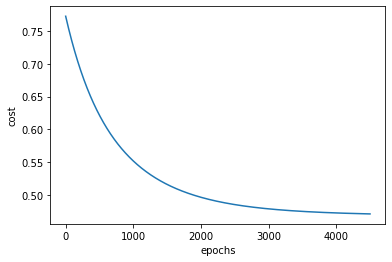

In [29]:
plt.plot(cost_list)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()

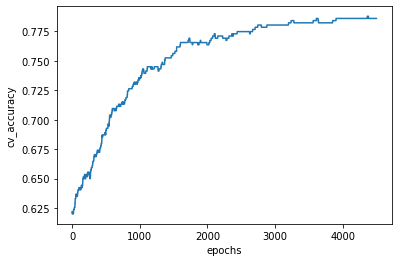

In [30]:
plt.plot(cv_accuracy)
plt.xlabel("epochs")
plt.ylabel("cv_accuracy")
plt.show()

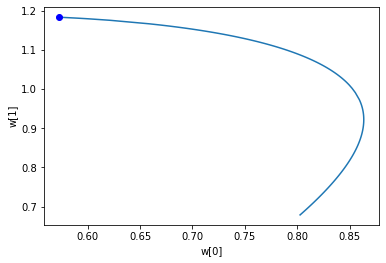

In [31]:
# 가중치 업데이트 과정 그래프 (임신횟수, 공복혈당농도)
w0 = []
w1 = []
for w in  w_history:
  w0.append(w[0])
  w1.append(w[1])
plt.plot(w0, w1)
plt.plot(w0[-1], w1[-1],'bo')
plt.xlabel('w[0]')
plt.ylabel('w[1]')
plt.show()

In [32]:
# 테스트 세트에 대한 정확도 구하기
x_test_scaled = scaler.transform(x_test)
a = sess.run(accuracy, feed_dict={X:x_test_scaled, Y:y_test})
print("정확도 : ", str(a*100)[:5], "%", sep="")

정확도 : 77.05%


In [0]:
# 임의의 샘플데이터 5개로 예측값 구해보기
X_test_5 = np.array([[4,120,70,20,80,30,0.5,33],
                     [11,120,70,20,80,30,0.5,33],
                     [4,190,70,20,80,30,0.5,33],
                     [4,120,160,20,80,30,0.5,33],
                     [4,120,70,100,80,30,0.5,33],
                     [4,120,70,20,300,30,0.5,33],
                     [4,120,70,20,80,50,0.5,33],
                     [4,120,70,20,80,30,2,33],
                     [4,120,70,20,80,30,0.5,100]])
X_test_5_scaled = scaler.transform(X_test_5)

In [34]:
print(sess.run(predicted, feed_dict={X:X_test_5_scaled}))

[[0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]]


In [35]:
try:
  x_input = input("입력(임신횟수, 공복혈당농도, 혈압, 피부주름두께, 혈정인슐린, BMI, 당뇨병가족력, 나이): ")
  if x_input == 'x':
    raise NotImplementedError
  x_input_strip =[ float(i.strip()) for i in x_input.split(",")]
  print("임신횟수\t공복혈당농도\t혈압\t\t피부주름두께\t혈정인슐린\tBMI\t\t당뇨병가족력\t나이")
  for i in x_input_strip:
    print(i,end="\t\t")
  print()
  x_input_test = np.array([x_input_strip]).astype('float32')

  x_input_test_scaled = scaler.transform(x_input_test)

  print("예상 결과 : ", (sess.run(predicted, feed_dict={X:x_input_test_scaled}))) 
  
except ValueError:
  print("입력을 다시 확인해주세요")
except NotImplementedError:
  print("종료")

입력(임신횟수, 공복혈당농도, 혈압, 피부주름두께, 혈정인슐린, BMI, 당뇨병가족력, 나이): 4,120,70,20,80,30,0.5,33
임신횟수	공복혈당농도	혈압		피부주름두께	혈정인슐린	BMI		당뇨병가족력	나이
4.0		120.0		70.0		20.0		80.0		30.0		0.5		33.0		
예상 결과 :  [[0.]]


In [0]:
result_df = pd.DataFrame(X_test_5, columns=['임신횟수', '공복혈당농도', '혈압', '피부주름두께', '혈정인슐린', 'BMI', '당뇨병가족력', '나이'])

In [37]:
result_df

,임신횟수,공복혈당농도,혈압,피부주름두께,혈정인슐린,BMI,당뇨병가족력,나이
0,4.0,120.0,70.0,20.0,80.0,30.0,0.5,33.0
1,11.0,120.0,70.0,20.0,80.0,30.0,0.5,33.0
2,4.0,190.0,70.0,20.0,80.0,30.0,0.5,33.0
3,4.0,120.0,160.0,20.0,80.0,30.0,0.5,33.0
4,4.0,120.0,70.0,100.0,80.0,30.0,0.5,33.0
5,4.0,120.0,70.0,20.0,300.0,30.0,0.5,33.0
6,4.0,120.0,70.0,20.0,80.0,50.0,0.5,33.0
7,4.0,120.0,70.0,20.0,80.0,30.0,2.0,33.0
8,4.0,120.0,70.0,20.0,80.0,30.0,0.5,100.0


In [0]:
result_df['예측 결과'] = sess.run(predicted, feed_dict={X:X_test_5_scaled})

In [0]:
result_df.loc[result_df["예측 결과"]==1,"예측 결과"] = "양성"
result_df.loc[result_df["예측 결과"]==0,"예측 결과"] = "음성"

In [40]:
result_df

,임신횟수,공복혈당농도,혈압,피부주름두께,혈정인슐린,BMI,당뇨병가족력,나이,예측 결과
0,4.0,120.0,70.0,20.0,80.0,30.0,0.5,33.0,음성
1,11.0,120.0,70.0,20.0,80.0,30.0,0.5,33.0,양성
2,4.0,190.0,70.0,20.0,80.0,30.0,0.5,33.0,양성
3,4.0,120.0,160.0,20.0,80.0,30.0,0.5,33.0,음성
4,4.0,120.0,70.0,100.0,80.0,30.0,0.5,33.0,음성
5,4.0,120.0,70.0,20.0,300.0,30.0,0.5,33.0,음성
6,4.0,120.0,70.0,20.0,80.0,50.0,0.5,33.0,양성
7,4.0,120.0,70.0,20.0,80.0,30.0,2.0,33.0,양성
8,4.0,120.0,70.0,20.0,80.0,30.0,0.5,100.0,음성


In [0]:
sess.close()